In [1]:
# Loading our existing trained model to test on Real-Time Human Face images 

import numpy as np
import os
import cv2 as cv
import matplotlib.pyplot as plt
from keras.models import load_model

model=load_model('facial_emotion_recognition_cnn.h5')
model.load_weights('facial_emotion_recognition_cnn_weights.h5')

Using TensorFlow backend.
W0705 01:33:15.945192 140475246520064 deprecation_wrapper.py:119] From /home/rahul/anaconda3/envs/pyenv37/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0705 01:33:15.974661 140475246520064 deprecation_wrapper.py:119] From /home/rahul/anaconda3/envs/pyenv37/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0705 01:33:15.993576 140475246520064 deprecation_wrapper.py:119] From /home/rahul/anaconda3/envs/pyenv37/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0705 01:33:16.029979 140475246520064 deprecation_wrapper.py:119] From /home/rahul/anaconda3/envs/pyenv37/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3980: The name tf.nn.avg_pool is d

In [2]:
filename='FaridaJalal_2.jpg'
path='dataset/test/'

image=cv.imread(path+filename)

In [3]:
image.shape

(298, 256, 3)

In [4]:
image=cv.cvtColor(image,cv.COLOR_BGR2GRAY)
image.shape

(298, 256)

In [5]:
image=cv.resize(image,(48,48),interpolation=cv.INTER_AREA)
image.shape

(48, 48)

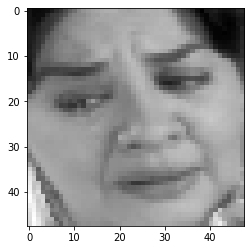

In [6]:
plt.imshow(image,cmap='gray')

In [8]:
image=np.array(image)
image=image.reshape(1,48,48,1)
image.shape

(1, 48, 48, 1)

In [18]:
# Method to pre-process the input image like converting it into grayscale image, reshaping it etc...

def preprocess_input_image(path,filename):
    image=cv.imread(path+filename)
    image=cv.cvtColor(image,cv.COLOR_BGR2GRAY)
    image=cv.resize(image,(48,48),interpolation=cv.INTER_AREA)
    plt.imshow(image,cmap='gray')
    image=np.array(image)
    image=image.reshape(1,48,48,1)
    return image

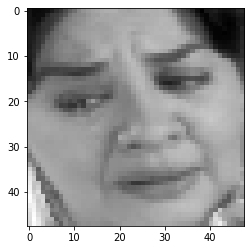

In [20]:
image=preprocess_input_image(path,filename)

In [21]:
y_pred=model.predict(image)

In [22]:
prob=np.argmax(y_pred)

In [26]:
# Function that returns the actual emotion name predicted the CNN model from the input image 

def get_actual_emotion_name(image):
    y_pred=model.predict(image)
    probability=np.argmax(y_pred)
    if probability==0: print('Its an Angry Face')
    elif probability==1: print('Its a Disgust Face')
    elif probability==2: print('Its a Fear Face')
    elif probability==3: print('Its a Happy Face')
    elif probability==4: print('Its a Sad Face')
    elif probability==5: print('Its a Surprise Face')
    elif probability==6: print('Its a Neutral Face')

In [24]:
get_actual_emotion_name(prob)

Its a Fear Face


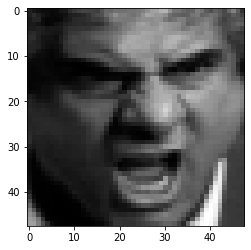

In [74]:
filename='Irani_37.jpg'                                                       # Image name
path='dataset/test/'                                                          # Destination Directory
image=preprocess_input_image(path,filename)

In [75]:
get_actual_emotion_name(image)

Its an Angry Face


In [ ]:
# This is not a very well-performing model as it has given a testing accuracy of 58% approx..